In [1]:
from simulation_functions import *

## Simulate six clusters:

In [2]:
%%time
cluster0 = simulate_cluster(N0=10**7, rh0=.1, Mgas0=0  , mBH0=10, MH0=10.0, tmax=14000, dt=.1, tge=100, seed=75)
cluster6 = simulate_cluster(N0=10**7, rh0=.1, Mgas0=1e6, mBH0=10, MH0=10.0, tmax=14000, dt=.1, tge=100)
cluster7 = simulate_cluster(N0=10**7, rh0=.1, Mgas0=1e7, mBH0=10, MH0=10.0, tmax=14000, dt=.1, tge=100)
cluster8 = simulate_cluster(N0=10**7, rh0=.1, Mgas0=1e8, mBH0=10, MH0=10.0, tmax=14000, dt=.1, tge=100)

cluster0_50 = simulate_cluster(N0=10**7, rh0=.1, Mgas0=0  , mBH0=50, MH0=50.0, tmax=14000, dt=.1, tge=100)
cluster7_50 = simulate_cluster(N0=10**7, rh0=.1, Mgas0=1e7, mBH0=50, MH0=50.0, tmax=14000, dt=.1, tge=100)

100%|█████████████████████████████████████████████████████████████████████████████████| 140000/140000 [01:03<00:00, 2219.69it/s]


CPU times: user 6min 17s, sys: 3.8 s, total: 6min 20s
Wall time: 6min 20s


In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, LogLocator, NullFormatter, StrMethodFormatter)

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

lw=3

c1, c2, c3, c4 = 'royalblue', 'darkorange', 'forestgreen', 'crimson'
l1, l2, l3, l4 = 'solid', 'dashed', 'dashdot', 'dotted'

## Plotting results:

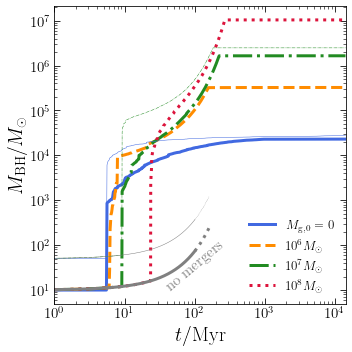

In [4]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(cluster0['t'], cluster0['M_H'], color=c1, lw=lw, linestyle=l1, label='$M_{\\rm g,0}=0$')
plt.plot(cluster6['t'], cluster6['M_H'], color=c2, lw=lw, linestyle=l2, label='$10^6M_\odot$')
plt.plot(cluster7['t'], cluster7['M_H'], color=c3, lw=lw, linestyle=l3, label='$10^7M_\odot$')
plt.plot(cluster8['t'], cluster8['M_H'], color=c4, lw=lw, linestyle=l4, label='$10^8M_\odot$')

plt.loglog()

plt.legend(fontsize=13, loc='lower right', frameon=False)

plt.tick_params(direction='in', top=True, right=True, labelsize=15, which='major', length=6)
plt.tick_params(direction='in', top=True, right=True, labelsize=15, which='minor', length=3)

plt.xlim(1, 14000)

plt.plot(cluster0_50['t'], cluster0_50['M_H'], lw=0.5, color=c1, linestyle=l1)
plt.plot(cluster7_50['t'], cluster7_50['M_H'], lw=0.5, color=c3, linestyle=l3)

plt.xlabel('$t/{\\rm Myr}$', size=20)
plt.ylabel('$M_{\\rm BH}/M_\odot$', size=20)

time = np.logspace(0, 2, 1000)
plt.plot(time, 10.0*np.exp(time/50.0), lw=3, color='grey')
plt.plot(time, 50.0*np.exp(time/50.0), lw=0.5, color='grey')

time = np.logspace(2, 2.2, 1000)
plt.plot(time, 10.0*np.exp(time/50.0), lw=3, linestyle='dotted', color='grey')
time = np.logspace(2, 2.2, 1000)
plt.plot(time, 50.0*np.exp(time/50.0), lw=0.5, linestyle='dotted', color='grey')

plt.text(35, 10, '$\\rm no\ mergers$', color='grey', size=15, rotation=40)

plt.tight_layout()
#plt.savefig('black_hole_mass_evolution.pdf')

/var/folders/mq/qkd4phxd7sv06z9g8q9cg_5w0000gn/T/ipykernel_38751/3608029105.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


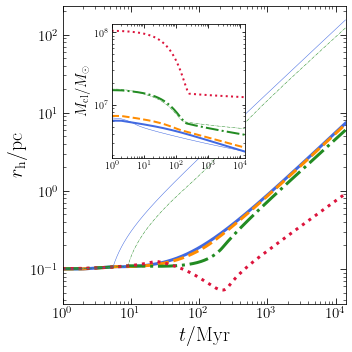

In [5]:
fig, ax = plt.subplots(figsize=(5, 5))

plt.plot(cluster0['t'], cluster0['r_h'], color=c1, lw=lw, linestyle=l1, label='$M_{\\rm g}=0$')
plt.plot(cluster6['t'], cluster6['r_h'], color=c2, lw=lw, linestyle=l2, label='$10^6M_\odot$')
plt.plot(cluster7['t'], cluster7['r_h'], color=c3, lw=lw, linestyle=l3, label='$10^7M_\odot$')
plt.plot(cluster8['t'], cluster8['r_h'], color=c4, lw=lw, linestyle=l4, label='$10^8M_\odot$')

plt.loglog()

plt.tick_params(direction='in', top=True, right=True, labelsize=15, which='major', length=6)
plt.tick_params(direction='in', top=True, right=True, labelsize=15, which='minor', length=3)

plt.xlim(1, 14000)

plt.xlabel('$t/{\\rm Myr}$', size=20)
plt.ylabel('$r_{\\rm h}/{\\rm pc}$', size=20)

# ----

left, bottom, width, height = [0.32, 0.55, 0.37, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

ax2.plot(cluster0['t'], cluster0['M_cl'], color=c1, lw=2, linestyle=l1, label='$M_{\\rm g}=0$')
ax2.plot(cluster6['t'], cluster6['M_cl'], color=c2, lw=2, linestyle=l2, label='$10^6M_\odot$')
ax2.plot(cluster7['t'], cluster7['M_cl'], color=c3, lw=2, linestyle=l3, label='$10^7M_\odot$')
ax2.plot(cluster8['t'], cluster8['M_cl'], color=c4, lw=2, linestyle=l4, label='$10^8M_\odot$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1, 14000)

ax2.set_ylabel('$M_{\\rm cl}/M_\odot$', size=15)
ax2.set_xticks([1, 10, 100, 1000, 10000])
ax2.minorticks_on()

y_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.yaxis.set_minor_locator(y_minor)
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.tick_params(axis='both', which = 'both', labelsize=10, direction = 'in', 
                bottom = True, top = True, right = True, left = True)
x_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.xaxis.set_minor_locator(x_minor)
ax2.xaxis.set_minor_formatter(NullFormatter())

# ----

ax.plot(cluster0_50['t'], cluster0_50['r_h'], color=c1, linestyle=l1, lw=0.5)
ax.plot(cluster7_50['t'], cluster7_50['r_h'], color=c3, linestyle=l3, lw=0.5)

ax2.plot(cluster0_50['t'], cluster0_50['M_cl'], color=c1, linestyle=l1, lw=0.5)
ax2.plot(cluster7_50['t'], cluster7_50['M_cl'], color=c3, linestyle=l3, lw=0.5)

plt.tight_layout()
#plt.savefig('global_evolution.pdf')

/var/folders/mq/qkd4phxd7sv06z9g8q9cg_5w0000gn/T/ipykernel_38751/215301510.py:42: RuntimeWarning: invalid value encountered in true_divide
  Rme0 = np.diff(Nme0[res0])/np.diff(cluster0['t'][res0])
/var/folders/mq/qkd4phxd7sv06z9g8q9cg_5w0000gn/T/ipykernel_38751/215301510.py:43: RuntimeWarning: invalid value encountered in true_divide
  Rme6 = np.diff(Nme6[res6])/np.diff(cluster6['t'][res6])
/var/folders/mq/qkd4phxd7sv06z9g8q9cg_5w0000gn/T/ipykernel_38751/215301510.py:44: RuntimeWarning: invalid value encountered in true_divide
  Rme7 = np.diff(Nme7[res7])/np.diff(cluster7['t'][res7])
/var/folders/mq/qkd4phxd7sv06z9g8q9cg_5w0000gn/T/ipykernel_38751/215301510.py:45: RuntimeWarning: invalid value encountered in true_divide
  Rme8 = np.diff(Nme8[res8])/np.diff(cluster8['t'][res8])
/var/folders/mq/qkd4phxd7sv06z9g8q9cg_5w0000gn/T/ipykernel_38751/215301510.py:86: RuntimeWarning: invalid value encountered in true_divide
  Rme0_50 = np.diff(Nme0_50[res0_50])/np.diff(cluster0_50['t'][res0_50])


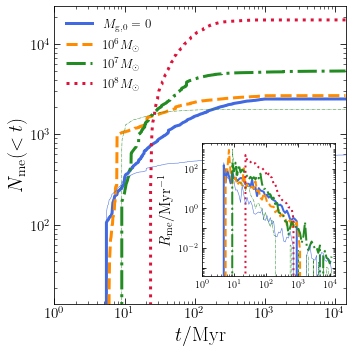

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))

Nme0 = np.cumsum(cluster0['k_in_me_re']) + np.cumsum(cluster0['k_in_me_ej']) + np.cumsum(cluster0['k_out_me']) +\
       np.cumsum(cluster0['k_cap'])
Nme6 = np.cumsum(cluster6['k_in_me_re']) + np.cumsum(cluster6['k_in_me_ej']) + np.cumsum(cluster6['k_out_me']) +\
       np.cumsum(cluster6['k_cap'])
Nme7 = np.cumsum(cluster7['k_in_me_re']) + np.cumsum(cluster7['k_in_me_ej']) + np.cumsum(cluster7['k_out_me']) +\
       np.cumsum(cluster7['k_cap'])
Nme8 = np.cumsum(cluster8['k_in_me_re']) + np.cumsum(cluster8['k_in_me_ej']) + np.cumsum(cluster8['k_out_me']) +\
       np.cumsum(cluster8['k_cap'])

step = 10

plt.plot(cluster0['t'], Nme0, color=c1, lw=lw, linestyle=l1, label='$M_{\\rm g,0}=0$')
plt.plot(cluster6['t'], Nme6, color=c2, lw=lw, linestyle=l2, label='$10^6M_\odot$')
plt.plot(cluster7['t'], Nme7, color=c3, lw=lw, linestyle=l3, label='$10^7M_\odot$')
plt.plot(cluster8['t'], Nme8, color=c4, lw=lw, linestyle=l4, label='$10^8M_\odot$')
plt.loglog()

plt.tick_params(direction='in', top=True, right=True, labelsize=15, which='major', length=6)
plt.tick_params(direction='in', top=True, right=True, labelsize=15, which='minor', length=3)

plt.xlim(1, 14000)

plt.xlabel('$t/{\\rm Myr}$', size=20)
plt.ylabel('$N_{\\rm me}(<t)$', size=20)

left, bottom, width, height = [0.57, 0.22, 0.37, 0.37]
ax2 = fig.add_axes([left, bottom, width, height])

step = 100

res = np.geomspace(1, cluster0['t'].size, step, endpoint = False)
res0 = np.array([int(res[i]) for i in range(res.size)])
res = np.geomspace(1, cluster6['t'].size, step, endpoint = False)
res6 = np.array([int(res[i]) for i in range(res.size)])
res = np.geomspace(1, cluster7['t'].size, step, endpoint = False)
res7 = np.array([int(res[i]) for i in range(res.size)])
res = np.geomspace(1, cluster8['t'].size, step, endpoint = False)
res8 = np.array([int(res[i]) for i in range(res.size)])

Rme0 = np.diff(Nme0[res0])/np.diff(cluster0['t'][res0])
Rme6 = np.diff(Nme6[res6])/np.diff(cluster6['t'][res6])
Rme7 = np.diff(Nme7[res7])/np.diff(cluster7['t'][res7])
Rme8 = np.diff(Nme8[res8])/np.diff(cluster8['t'][res8])

ax2.plot(cluster0['t'][res0][:-1], Rme0, color=c1, lw=2, linestyle=l1, label='$M_{\\rm g}=0$')
ax2.plot(cluster6['t'][res6][:-1], Rme6, color=c2, lw=2, linestyle=l2, label='$10^6M_\odot$')
ax2.plot(cluster7['t'][res7][:-1], Rme7, color=c3, lw=2, linestyle=l3, label='$10^7M_\odot$')
ax2.plot(cluster8['t'][res8][:-1], Rme8, color=c4, lw=2, linestyle=l4, label='$10^8M_\odot$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xlim(1, 14000)

ax2.set_ylabel('$R_{\\rm me}/{\\rm Myr}^{-1}$', size=15)
ax2.set_xticks([1, 10, 100, 1000, 10000])
ax2.set_yticks([1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], 
               [' ', '$10^{-2}$', ' ', '$10^{0}$', ' ', '$10^2$'])
ax2.minorticks_on()

y_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.yaxis.set_minor_locator(y_minor)
ax2.yaxis.set_minor_formatter(NullFormatter())
ax2.tick_params(axis='both', which = 'both', labelsize=10, direction = 'in', 
                bottom = True, top = True, right = True, left = True)
x_minor = LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax2.xaxis.set_minor_locator(x_minor)
ax2.xaxis.set_minor_formatter(NullFormatter())

ax.legend(fontsize=13, loc='upper left', frameon=False)

Nme0_50 = np.cumsum(cluster0_50['k_in_me_re']) + np.cumsum(cluster0_50['k_in_me_ej']) + \
          np.cumsum(cluster0_50['k_out_me']) + np.cumsum(cluster0_50['k_cap'])

Nme7_50 = np.cumsum(cluster7_50['k_in_me_re']) + np.cumsum(cluster7_50['k_in_me_ej']) + \
          np.cumsum(cluster7_50['k_out_me']) + np.cumsum(cluster7_50['k_cap'])

ax.plot(cluster0_50['t'], Nme0_50, color=c1, linestyle=l1, lw=0.5)
ax.plot(cluster7_50['t'], Nme7_50, color=c3, linestyle=l3, lw=0.5)

res = np.geomspace(1, cluster0_50['t'].size, step, endpoint = False)
res0_50 = np.array([int(res[i]) for i in range(res.size)])
res = np.geomspace(1, cluster7_50['t'].size, step, endpoint = False)
res7_50 = np.array([int(res[i]) for i in range(res.size)])

Rme0_50 = np.diff(Nme0_50[res0_50])/np.diff(cluster0_50['t'][res0_50])
Rme7_50 = np.diff(Nme7_50[res7_50])/np.diff(cluster7_50['t'][res7_50])

ax2.plot(cluster0_50['t'][res0_50][:-1], Rme0_50, color=c1, lw=0.5, linestyle=l1)
ax2.plot(cluster7_50['t'][res7_50][:-1], Rme7_50, color=c3, lw=0.5, linestyle=l3)

plt.tight_layout()
#plt.savefig('merger_rate_evolution.pdf')